In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')        #default, classic, seaborn, Solarize_Light2, bmh, fivethirtyeight, fast, ggplot
mpl.rc('font', family='Ayuthaya')
%matplotlib inline

# Cleansing data

In [2]:
# import property data
property_df = pd.read_csv('opendata_project.csv')
# property_df.info()

In [3]:
# cast and create datetime column
property_df['date_created'] = pd.to_datetime(property_df['date_created'])
property_df['date_finish'] = pd.to_datetime(property_df['date_finish'])
property_df['date_updated'] = pd.to_datetime(property_df['date_updated'])
property_df['year_create'] = property_df['date_created'].dt.year
property_df['year_finish'] = property_df['date_finish'].dt.year

# drop unuse column
property_df = property_df.drop(columns=['row_number'])
property_df = property_df.drop(columns=['source'])
property_df = property_df.drop(columns=['url_project'])

In [4]:
# drop row that have Na value
property_df.dropna(subset = ["neighborhood_name_th", "subdistrict_id", "date_finish"], inplace=True)

# drop row unuse property type
property_df.drop(property_df[property_df.propertytype_name_th == 'โกดัง / โรงงาน'].index, inplace=True)
property_df.drop(property_df[property_df.propertytype_name_th == 'ที่ดิน'].index, inplace=True)
property_df.drop(property_df[property_df.propertytype_name_th == 'สำนักงาน'].index, inplace=True)
property_df.drop(property_df[property_df.propertytype_name_th == 'โรงแรม'].index, inplace=True)
property_df.drop(property_df[property_df.propertytype_name_th == 'อพาตเมนต์'].index, inplace=True)


In [5]:
# fill Na specific name and value of each column
values = {"price_min": 0, "developer_name_en": "-", "developer_name_th": "-", "zipcode": 0}
property_df2 = property_df.fillna(value=values)

# fill Na all with 0
property_df2 = property_df2.fillna(0).reset_index(drop=True)

# merge property type 'บ้านแฝด' with 'บ้าน'
property_df2['propertytype_name_th'] = property_df2['propertytype_name_th'].apply(lambda x: 'บ้าน' if x == 'บ้านแฝด' else x)
# cast type
property_df2[["price_min"]] = property_df2[["price_min"]].apply(pd.to_numeric)
property_df2.head(5)

,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,developer_name_th,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,year_create,year_finish
0,project_12591,Supalai Ville Sukhumvit-Srinakarin,ศุภาลัย วิลล์ สุขุมวิท-ศรีนครินทร์,3,Townhome,ทาวน์โฮม,1840000.0,developer_97,Supalai Public Company Limited,บริษัท ศุภาลัย จำกัด (มหาชน),...,0.0,1.0,1.0,1.0,1.0,2017-12-15 14:39:29,2009-12-31 07:00:00,2020-12-04 10:44:32,2017.0,2009.0
1,project_5363,Baan Samretvill 1,บ้านสำเร็จวิลล์ 1,3,Townhome,ทาวน์โฮม,1100000.0,developer_10510,-,-,...,0.0,0.0,0.0,0.0,0.0,2017-03-28 10:25:41,1970-01-02 07:00:00,2020-12-04 10:38:03,2017.0,1970.0
2,project_8210,Baan Thip Net,บ้านทิพย์เนตร,1,Detached House,บ้าน,0.0,developer_10510,-,-,...,0.0,0.0,0.0,0.0,0.0,2017-07-04 08:38:26,1970-01-02 07:00:00,2020-12-04 10:38:09,2017.0,1970.0
3,project_15921,Piyawat Garden Ville,ปิยวัฒน์ การ์เด้นวิลล์,20000,Twin house,บ้าน,2900000.0,developer_10043,-,บริษัท ธนาลัย พัฒนา จำกัด,...,0.0,0.0,0.0,0.0,0.0,2019-07-02 13:15:49,1970-01-02 07:00:00,2020-12-04 10:42:57,2019.0,1970.0
4,project_6089,Baan Nanthavee 4 Resort,บ้านนันททวี 4 รีสอร์ท,3,Townhome,ทาวน์โฮม,1590000.0,developer_2097,"Noantawee Residence Co., Ltd.",บริษัท นนทวี เรสซิเด๊นซ์ จำกัด,...,0.0,1.0,0.0,0.0,1.0,2017-04-21 10:01:55,2012-07-31 07:00:00,2020-12-04 10:46:00,2017.0,2012.0


# Data analysis

In [6]:
#check property type
groupped_df = property_df2.groupby('propertytype_name_th').count().reset_index()
groupped_df.iloc[:,0]


0           คอนโด
1        ทาวน์โฮม
2            บ้าน
3    อาคารพาณิชย์
4       โฮมออฟฟิศ
Name: propertytype_name_th, dtype: object

In [7]:
# prepare x and y axis data (count)
condo_df = property_df2.loc[property_df2['propertytype_name_th'] == 'คอนโด', :].groupby('year_create').count().reset_index()
condo_np = condo_df.loc[:, 'name_th'].to_numpy()[3:]
townhome_df = property_df2.loc[property_df2['propertytype_name_th'] == 'ทาวน์โฮม', :].groupby('year_create').count().reset_index()
townhome_np = townhome_df.loc[:, 'name_th'].to_numpy()[3:]
home_df = property_df2.loc[property_df2['propertytype_name_th'] == 'บ้าน', :].groupby('year_create').count().reset_index()
home_np = home_df.loc[:, 'name_th'].to_numpy()[3:]
y = [condo_np, townhome_np, home_np]
print(y)

x_axis = property_df2.loc[:, 'year_create'].unique()
x_axis.sort()
x_axis = x_axis[3:]
print(x_axis)

[array([153, 465, 488, 103,  76]), array([158, 581, 378,  68,  56]), array([255, 684, 549,  86, 120])]
[2018. 2019. 2020. 2021. 2022.]


In [8]:
# prepare y axis data (price)
condo_df = property_df2.loc[(property_df2['propertytype_name_th'] == 'คอนโด'), :].groupby('year_create').price_min.agg('mean').reset_index()
condo_np = condo_df.loc[:, 'price_min'].to_numpy()[3:]
townhome_df = property_df2.loc[property_df2['propertytype_name_th'] == 'ทาวน์โฮม', :].groupby('year_create').price_min.agg('mean').reset_index()
townhome_np = townhome_df.loc[:, 'price_min'].to_numpy()[3:]
home_df = property_df2.loc[property_df2['propertytype_name_th'] == 'บ้าน', :].groupby('year_create').price_min.agg('mean').reset_index()
home_np = home_df.loc[:, 'price_min'].to_numpy()[3:]
y1 = [condo_np, townhome_np, home_np]
print(y1)

[array([4445996.07843137, 4484027.02365591, 4142195.65368852,
       2137399.51456311, 1622026.31578947]), array([2290632.91139241, 2541912.22030981, 3527314.80687831,
       3018514.70588235, 2806428.57142857]), array([4786407.84313725, 6069097.66081871, 5578269.57559199,
       6066441.86046512, 3435608.33333333])]


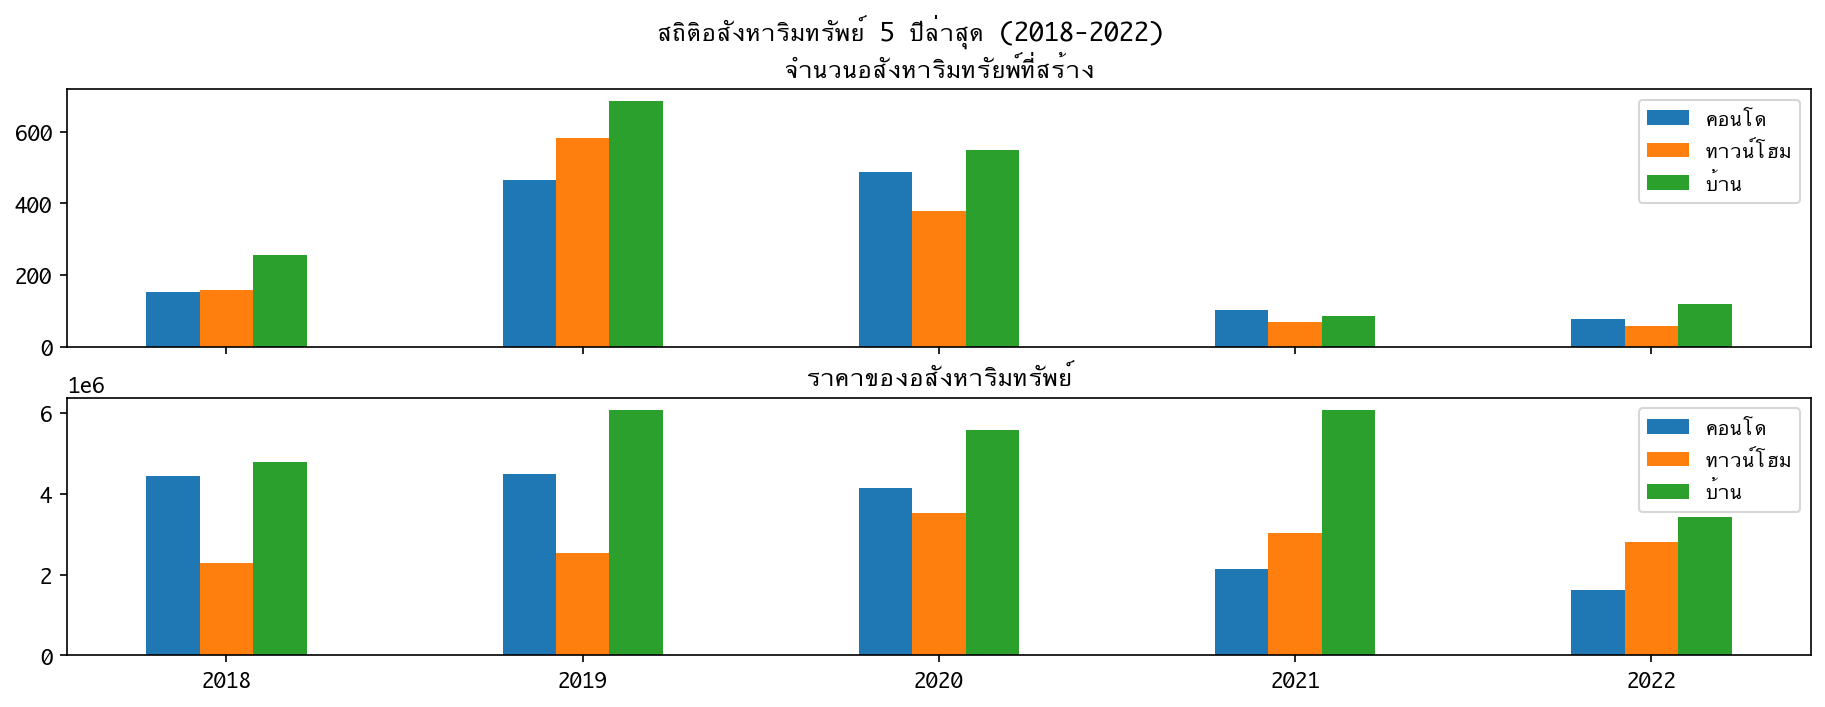

In [9]:
# plot bar plot shown property count and avg price in year 2018 - 2022
fig, ax = plt.subplots(2, 1, figsize=(15,5), dpi=150, sharex='col')
fig.suptitle('สถิติอสังหาริมทรัพย์ 5 ปีล่าสุด (2018-2022)')
fig.subplots_adjust(hspace=0.2, wspace=0.3)

ax[0].set_title(f"จำนวนอสังหาริมทรัยพ์ที่สร้าง")
ax[0].bar(x_axis - 0.15, y[0], width = 0.15, label = 'คอนโด')
ax[0].bar(x_axis, y[1], width = 0.15, label = 'ทาวน์โฮม')
ax[0].bar(x_axis + 0.15, y[2], width = 0.15, label = 'บ้าน')
ax[0].legend()

ax[1].set_title(f"ราคาของอสังหาริมทรัพย์")
ax[1].bar(x_axis - 0.15, y1[0], width = 0.15, label = 'คอนโด')
ax[1].bar(x_axis, y1[1], width = 0.15, label = 'ทาวน์โฮม')
ax[1].bar(x_axis + 0.15, y1[2], width = 0.15, label = 'บ้าน')
_ = ax[1].legend()

### ภาพรวมของอสังหาริมทรัพย์ประเภทที่อยู่อาศัย (คอนโด, ทาวน์โฮม, บ้าน)
จากกราฟแสดงให้เห็นว่าภาพรวมของอสังหาริมทรัพย์ประเภทที่เป็นที่อยู่อาศัย มีการสร้างที่น้อยลงตั้งแต่ปี 2020 เป็นต้นมา และคอนโดเป็นอสังหาริมทรัพย์ที่กราฟมีแนวโน้มที่ราคาจะลดลงมากที่สุด

In [10]:
# 10 เขตที่มีราคาคอนโดสูงสุดเฉลี่ย 5 ปีล่าสุด
bangkok_property_df = property_df2.loc[property_df2['province_name_th'] == 'กรุงเทพมหานคร', :]
bangkok_condo_df = bangkok_property_df.loc[bangkok_property_df['propertytype_name_th'] == 'คอนโด', :]
bangkok_condo_5y_df = bangkok_condo_df.loc[bangkok_condo_df['year_create'] >= 2018, :]
groupped_df = bangkok_condo_5y_df.groupby(['district_name_th']).mean().reset_index()
price_per_district_df = groupped_df.iloc[:,0:2]
price_per_district_df.sort_values('price_min', inplace=True, ascending=False)
price_per_district_df.reset_index(drop=True, inplace=True)
price_per_district_df = price_per_district_df.loc[0:9,:]
price_per_district_df.sort_values('price_min', inplace=True)
price_per_district_df

,district_name_th,price_min
9,บางคอแหลม,4.163333e+06
8,ยานนาวา,4.205333e+06
7,บางรัก,4.318950e+06
6,พญาไท,4.353730e+06
5,ราชเทวี,4.804000e+06
4,คลองเตย,6.962521e+06
3,คลองสาน,7.951000e+06
2,วัฒนา,8.930753e+06
1,ปทุมวัน,1.089520e+07
0,สาทร,1.247885e+07


In [11]:
# prepare x and y axis
district_np = price_per_district_df.loc[:,'district_name_th'].to_numpy()
x_axis = np.arange(len(district_np))
y = price_per_district_df.loc[:,'price_min'].to_numpy()
print(x_axis)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 4163333.33333333  4205333.33333333  4318950.          4353729.72972973
  4804000.          6962520.98765432  7951000.          8930753.19230769
 10895195.65217391 12478850.05      ]


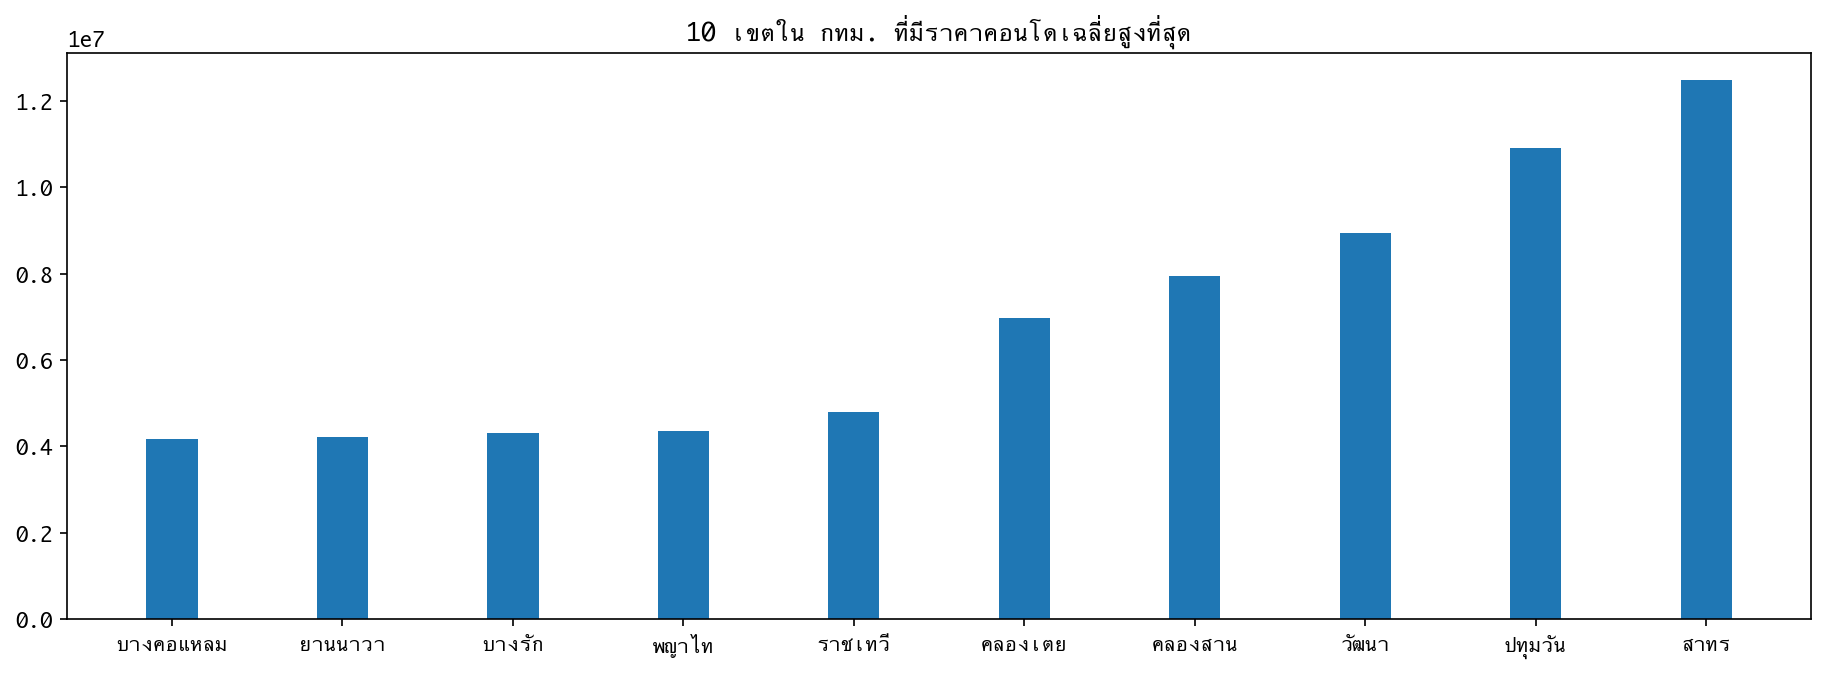

In [12]:
# plot rank of condo price in Bangkok
plt.figure(figsize=(15,5),dpi=150)
plt.bar(x_axis, y, width = 0.3)
plt.title('10 เขตใน กทม. ที่มีราคาคอนโดเฉลี่ยสูงที่สุด')
_ = plt.xticks(x_axis, district_np)

### 10 เขตที่ราคาคอนโดเฉลี่ยสูงสุดในเขตของกรุงเทพมหานคร ปี 2018 - 2020
จากกราฟแสดงให้เห็นว่าเขตที่เป็นพื้นที่ทำงานจะมีราคาเฉลี่ยของคอนโดที่ค่อนข้างสูงเมื่อเทียบกับเขตที่ไกลออกมา เนื่องจากพื้นที่ที่เป็นที่อยู่อาศัยมีน้อยและเป็นแหล่งที่ทำงาน ราคาของคอนโดจึงเพิ่มขึ้นตามความต้องการที่อยู่อาศัยในเขตเมือง

In [13]:
# read csv new dataset
popden_df = pd.read_csv('population_2558_sort_name.csv')

# drop unuse column
popden_df.drop(columns='index', inplace=True)

# create column density
popden_df['density'] = popden_df['population'] / popden_df['area_km2']
popden_df.head(5)

,district_name_th,population,area_km2,density
0,คลองเตย,106233,12.994,8175.542558
1,คลองสาน,74796,6.051,12360.932077
2,คลองสามวา,184306,110.686,1665.124767
3,คันนายาว,94242,25.980,3627.482679
4,จตุจักร,159514,32.908,4847.271180


In [14]:
# join table
merged_df = price_per_district_df.merge(popden_df, right_on='district_name_th', left_on='district_name_th')
merged_df

,district_name_th,price_min,population,area_km2,density
0,บางคอแหลม,4.163333e+06,91405,10.921,8369.654794
1,ยานนาวา,4.205333e+06,80211,16.662,4814.007922
2,บางรัก,4.318950e+06,46777,5.536,8449.602601
3,พญาไท,4.353730e+06,71864,9.595,7489.734237
4,ราชเทวี,4.804000e+06,73597,7.126,10327.953971
5,คลองเตย,6.962521e+06,106233,12.994,8175.542558
6,คลองสาน,7.951000e+06,74796,6.051,12360.932077
7,วัฒนา,8.930753e+06,84214,12.565,6702.268205
8,ปทุมวัน,1.089520e+07,50673,8.369,6054.845262
9,สาทร,1.247885e+07,81745,9.326,8765.279863


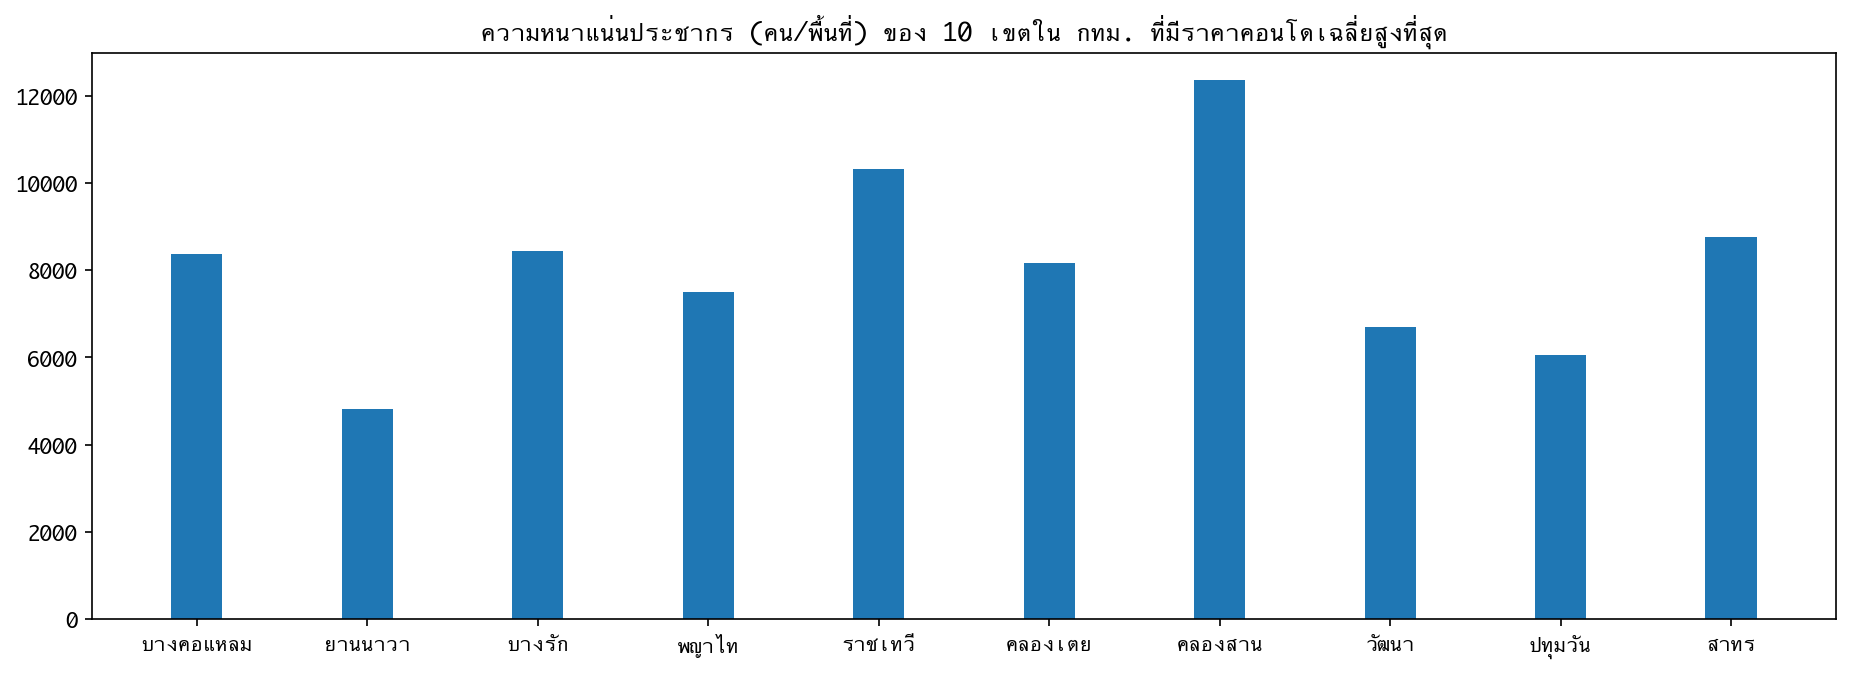

In [15]:
# prepare y axis and plot density
y = price_per_district_df.loc[:,'price_min'].to_numpy()
y_new = merged_df.loc[:, 'density'].to_numpy()
y_comp = [y, y_new]
plt.figure(figsize=(15,5),dpi=150)
plt.bar(x_axis, y_comp[1], width = 0.3)
plt.title('ความหนาแน่นประชากร (คน/พื้นที่) ของ 10 เขตใน กทม. ที่มีราคาคอนโดเฉลี่ยสูงที่สุด')
_ = plt.xticks(x_axis, district_np)

### 10 อันดับเขตในกรุงเทพมหานครที่มีประชากรหนาแน่นที่สุด
หากเปรียบเทียบระหว่างจำนวนคนที่อาศัยอยู่และขนาดพื้นที่ของเขตนั้นๆจะสามารถเห็นภาพได้ว่าในเขตนั้นความต้องการของที่พักอาศัยจะมากไปด้วย

In [16]:
# find condo in คลองสาน district
ks_condo_df = bangkok_condo_5y_df.loc[bangkok_condo_5y_df['district_name_th'] == 'คลองสาน', :].reset_index(drop=True)
ks_condo_df['facillity_score'] = ks_condo_df['facility_clubhouse'] + ks_condo_df['facility_fitness'] + ks_condo_df['facility_meeting'] \
    + ks_condo_df['facility_park'] + ks_condo_df['facility_playground'] + ks_condo_df['facility_pool'] + ks_condo_df['facility_security']
ks_condo_rank_df = ks_condo_df.loc[:, ['name_th', 'facillity_score', 'count_unit']].sort_values('facillity_score', ascending=True).reset_index(drop=True)
ks_condo_rank_df

,name_th,facillity_score,count_unit
0,สายชล แมนชั่น,0.0,114.0
1,เรฟเฟอเรนซ์ สาทร – วงเวียนใหญ่,0.0,815.0
2,บ้านเจ้าพระยา 2 ชลบุรี,3.0,0.0
3,ไฮป์ สาทร-ธนบุรี,4.0,911.0
4,เซียล่า เจริญนคร,4.0,105.0
5,บันยัน ทรี เรสซิเดนซ์ ริเวอร์ไซด์ กรุงเทพ,4.0,133.0
6,แชปเตอร์ เจริญนคร-ริเวอร์ไซด์,5.0,667.0
7,ไอดีโอ สาทร-วงเวียนใหญ่,5.0,508.0
8,เฟล็กซี่ สาทร-เจริญนคร,5.0,864.0
9,ศุภาลัย ลอฟท์ ประชาธิปก-วงเวียนใหญ่,6.0,363.0


In [17]:
# prepare x and y axis
condo_name_np = ks_condo_rank_df.loc[:,'name_th'].to_numpy()
x_axis = np.arange(len(condo_name_np))
f_score_np = ks_condo_rank_df.loc[:,'facillity_score'].to_numpy()
count_unit_np = ks_condo_rank_df.loc[:,'count_unit'].to_numpy()
y = [f_score_np, count_unit_np]
print(x_axis)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[array([0., 0., 3., 4., 4., 4., 5., 5., 5., 6.]), array([114., 815.,   0., 911., 105., 133., 667., 508., 864., 363.])]


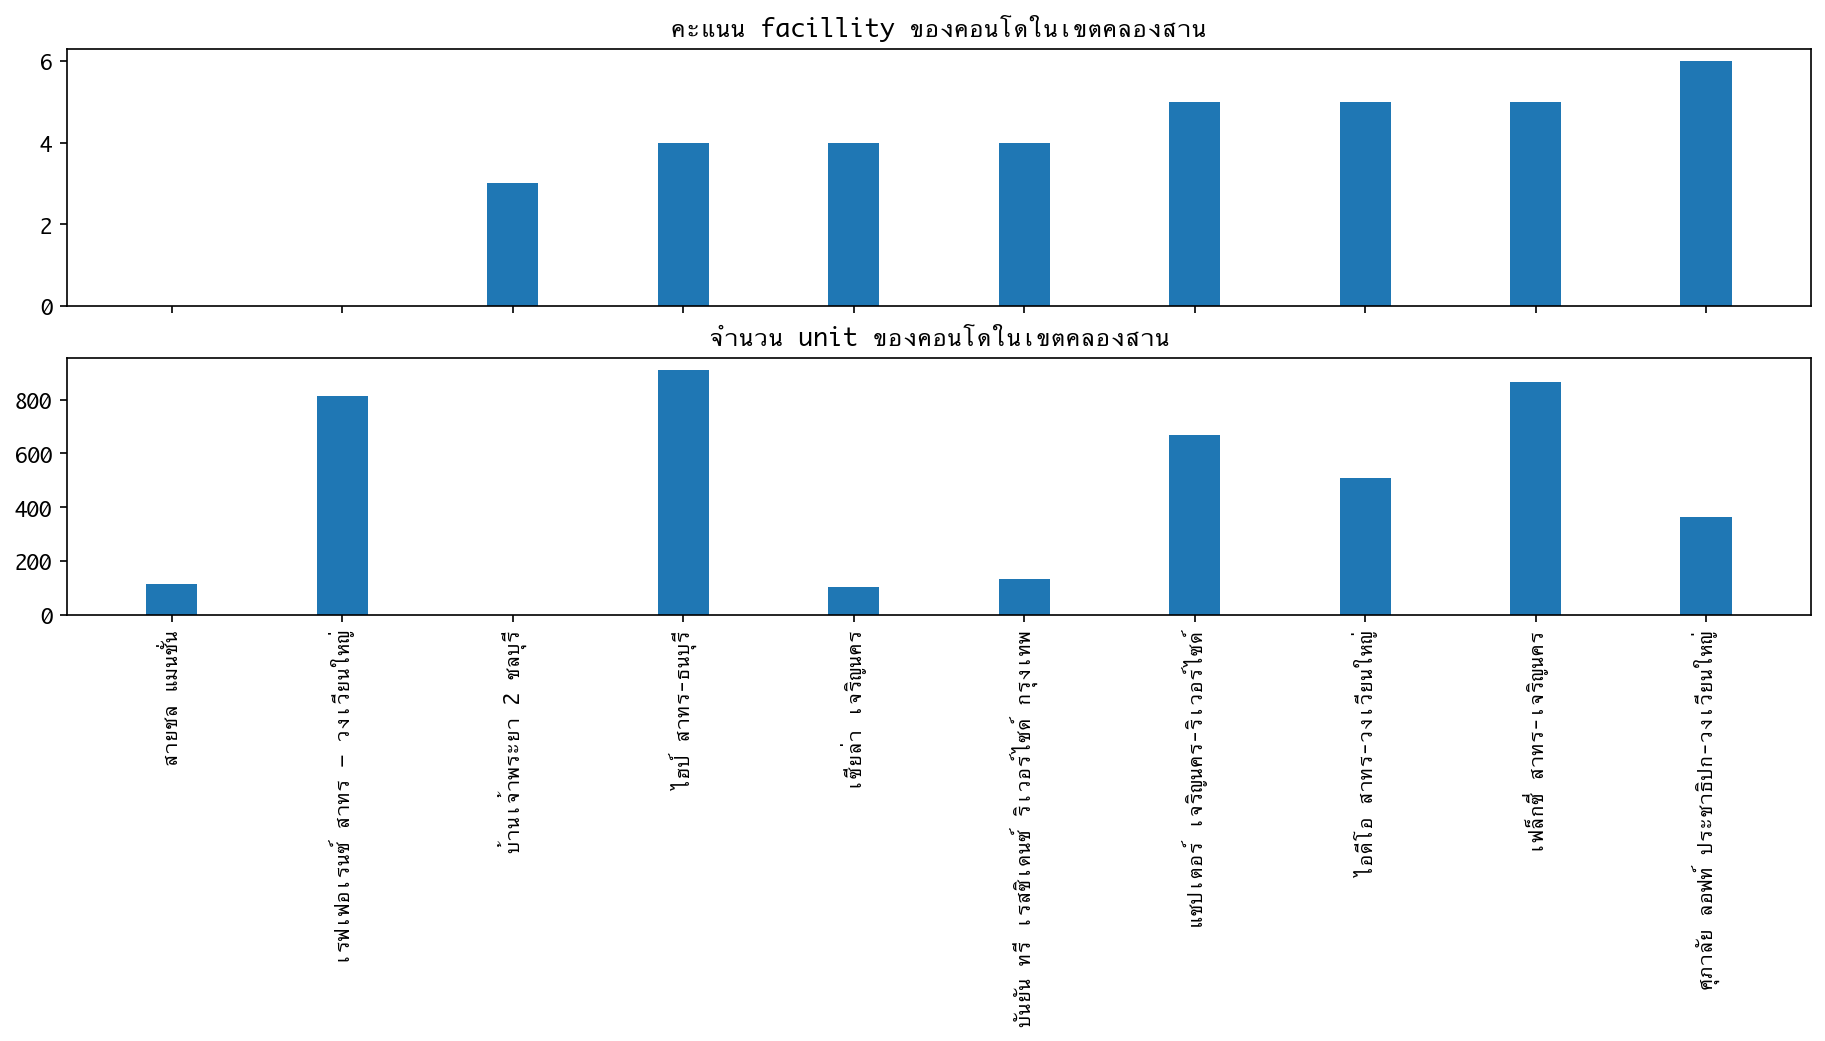

In [18]:
# plot facillity score and unit count
fig, ax = plt.subplots(2, 1, figsize=(15,5), dpi=150, sharex='col')
fig.subplots_adjust(hspace=0.2, wspace=0.3)

ax[0].set_title(f"คะแนน facillity ของคอนโดในเขตคลองสาน")
ax[0].bar(x_axis, y[0], width = 0.3)
ax[1].set_title(f"จำนวน unit ของคอนโดในเขตคลองสาน")
ax[1].bar(x_axis, y[1], width = 0.3)
_ = plt.xticks(x_axis, condo_name_np, rotation=90)

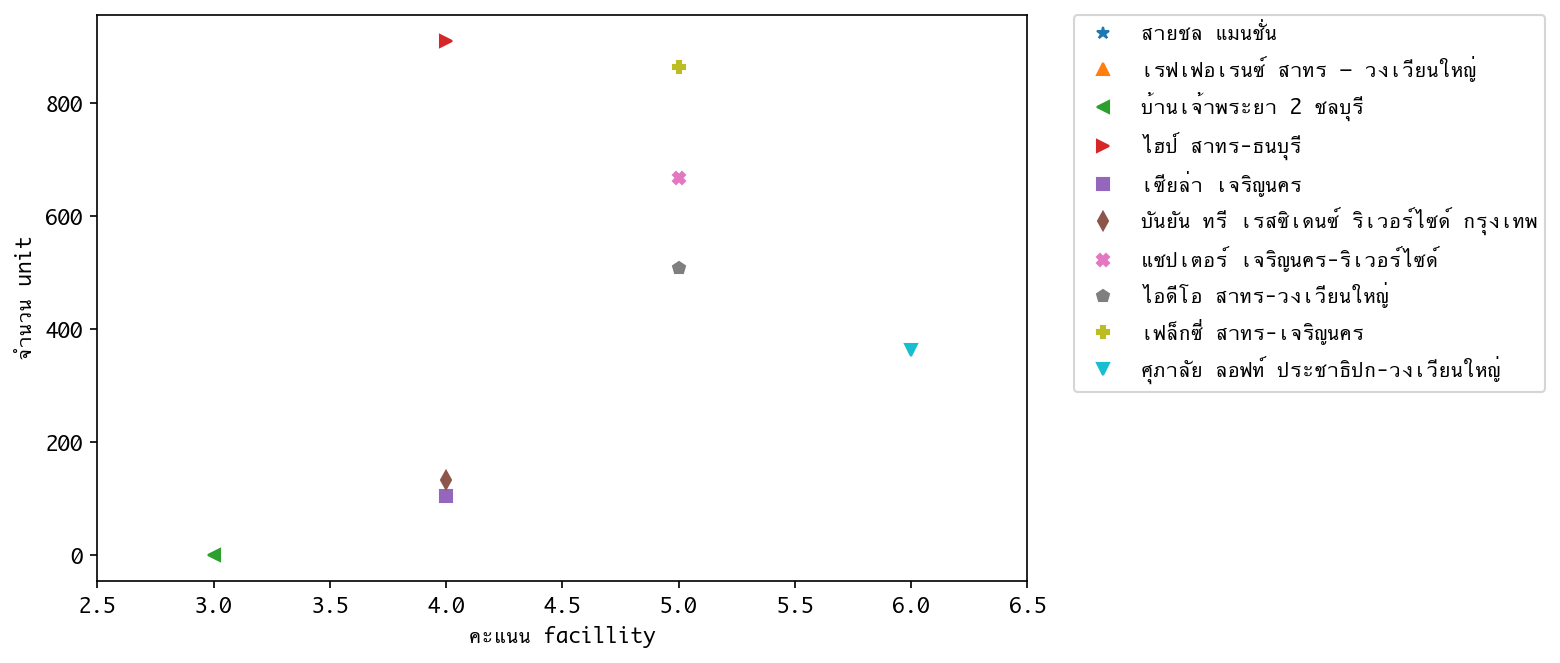

In [19]:
# plot another facillity score and unit count
plt.figure(figsize=(8,5),dpi=150)
marker = ['*','^','<','>','s','d','X','p','P','v']
for i in range(10):
    plt.plot( y[0][i], y[1][i], marker[i], label=condo_name_np[i])
plt.legend(numpoints=1, bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)
plt.xlim(2.5, 6.5)
plt.xlabel('คะแนน facillity')
_ = plt.ylabel('จำนวน unit')


### สรุป
จากกราฟด้านบน จะเห็นว่าคอนโดที่มีคะแนน facillity ที่สูงเกิน 5 ขึ้นไปมีทั้งหมด 4 ที่ ซึ่งจะทำให้คอนโดนั้นๆมีจุดดึงดูดให้คนเข้ามาอาศัยได้ และจำนวนที่พักอาศัยภายในโครงการก็มีส่วนสำคัญในการเลือกอาศัยคอนโดเช่นกัน ดังนั้นถ้าหากต้องการคอนโดเพื่อนำไปลงทุนในการปล่อยเช่า จากชุดข้อมูลข้างต้นนี้ทำให้เห็นว่าควรจะตัดสินใจซื้อคอนโดที่มีคะแนน facillity ที่ดีและมีจำนวน unit ที่ไม่มากเกินไป